In [3]:
import csv
import pandas as pd
data ='./NetflixViewingHistory.csv'
df = pd.read_csv(data)

In [4]:
df

,Title,Date
0,Stranger Things: Stranger Things 4: Chapter Tw...,7/1/22
1,Soul Surfer,6/30/22
2,Lean on Me,6/29/22
3,All That: Season 3: Episode 2,6/27/22
4,All That: Season 3: Episode 1,6/27/22
...,...,...
1482,Ozark: Season 1: Tonight We Improvise,9/23/18
1483,Ozark: Season 1: My Dripping Sleep,9/23/18
1484,Ozark: Season 1: Blue Cat,9/23/18
1485,Ozark: Season 1: Sugarwood,9/23/18


In [6]:
df.dtypes

Title    object
Date     object
dtype: object

In [7]:
df["Date2"] = pd.to_datetime(df["Date"])


In [11]:
df

,Title,Date,Date2
0,Stranger Things: Stranger Things 4: Chapter Tw...,7/1/22,2022-07-01
1,Soul Surfer,6/30/22,2022-06-30
2,Lean on Me,6/29/22,2022-06-29
3,All That: Season 3: Episode 2,6/27/22,2022-06-27
4,All That: Season 3: Episode 1,6/27/22,2022-06-27
...,...,...,...
1482,Ozark: Season 1: Tonight We Improvise,9/23/18,2018-09-23
1483,Ozark: Season 1: My Dripping Sleep,9/23/18,2018-09-23
1484,Ozark: Season 1: Blue Cat,9/23/18,2018-09-23
1485,Ozark: Season 1: Sugarwood,9/23/18,2018-09-23


In [12]:
videos_count = len(df)

max_time = df["Date2"].max()
min_time = df["Date2"].min()
print("The dataset includes videos from {} to {}.".format(min_time.strftime("%m/%d/%Y"), max_time.strftime("%m/%d/%Y")))

days_count = max_time - min_time
days_count = days_count.days
avg_views = videos_count / days_count
print("I watched {} videos over {} days. That's an average of {:.1f} per day.".format(videos_count, days_count, avg_views))

The dataset includes videos from 09/23/2018 to 07/01/2022.
I watched 1487 videos over 1377 days. That's an average of 1.1 per day.


<AxesSubplot: >

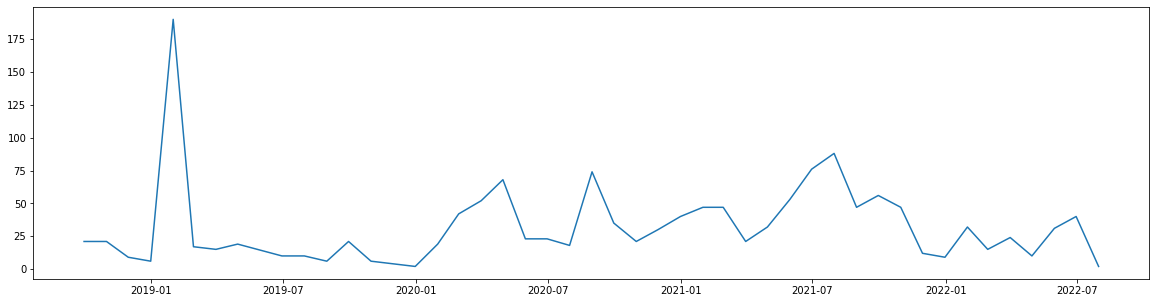

In [15]:
from pandas.tseries.offsets import *

df["day"] = pd.to_datetime(df['Date2']).dt.date

df['week ending'] = df['Date2'] + Week(weekday=4)
df["week ending day"] = pd.to_datetime(df['week ending']).dt.date

df['month ending'] = pd.to_datetime(df['Date2']) + MonthEnd(1)
df["month ending day"] = pd.to_datetime(df['month ending']).dt.date

# s = df['day'].value_counts().sort_index()
# s.plot(figsize=(20,5))

# s2 = df['week ending day'].value_counts().sort_index()
# s2.plot(figsize=(20,5))

s3 = df['month ending day'].value_counts().sort_index()
s3.plot(figsize=(20,5))